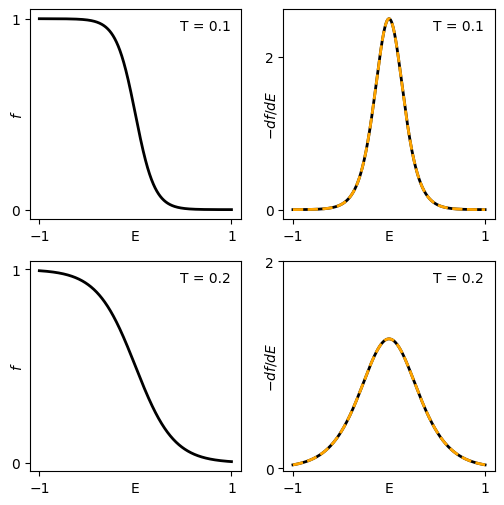

In [41]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
from tblib import fermi
reload(fermi)

energy_arr = np.linspace(-1, 1, 1000) # energy array
temp_vals = [1e-1, 2e-1] # temperature values

fd = np.array(fermi.fermi_dirac(energy_arr, temp_vals))
fd_p = np.array(fermi.fermi_dirac_prime(energy_arr, temp_vals))
fd_pn = np.gradient(fd, energy_arr, axis=0) # compare against numerical derivatives

nrows = len(temp_vals)
fig, axes = plt.subplots(nrows,2, figsize=(6,3*nrows), dpi=100, squeeze=False)

for i in range(len(temp_vals)):
    axes[i,0].plot(energy_arr, fd[:,i], c='k', lw=2)
    axes[i,1].plot(energy_arr, -fd_p[:,i], c='k', lw=2)
    axes[i,1].plot(energy_arr, -fd_pn[:,i], c='orange', lw=2,ls='--')

    axes[i,0].set_ylabel('$f$', labelpad=-10)
    axes[i,0].set_yticks([0, 1])
    axes[i,1].set_ylabel('$-df/dE$', labelpad=-10)
    axes[i,1].set_yticks([0, np.round(np.max(abs(fd_p)))])

    for ax in axes[i]:
        ax.set_xlabel('E', labelpad=-10)
        ax.set_xticks([-1, 1])
        ax.text(0.95, 0.9, f'T = {temp_vals[i]}', ha='right', transform=ax.transAxes)

In [43]:
nk = 100
karr = np.linspace(-np.pi, np.pi, nk)
k_grid = np.array(np.meshgrid(karr, karr)).T.reshape(-1,2)

print("k_grid shape:", k_grid.shape)

k_grid shape: (10000, 2)
